In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV

In [51]:
%matplotlib inline
df = pd.read_csv('Telco_customer_churn.csv')
pd.set_option('display.max_columns', 50)

In [52]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [54]:
for col in df.columns:
    unique_values = pd.unique(df[col])
    print(f"{col}:{unique_values}")

CustomerID:['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Count:[1]
Country:['United States']
State:['California']
City:['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Zip Code:[90003 90005 90006 ... 96128 96134 96146]
Lat Long:['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Latitude:[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Longitude:[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Gender:['Male' 'Female']
Senior Citizen:['No' 'Yes']
Partner:['No' 'Yes']
Dependents:['No' 'Yes']
Tenure Months:[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Phone Service:['Yes' 'No']
Mult

In [55]:
df = df.drop(['CustomerID','Count','Country','State','Lat Long','Latitude','Longitude','Zip Code','Churn Label'],axis=1)

In [56]:
df.loc[df['Total Charges'] == ' '] = 0

In [59]:
df['Total Charges'] = df['Total Charges'].astype(int)

In [60]:

colors = ['#faebd7','#008080']

In [61]:
# per creare automaticamente due liste per identificare variabili numeriche e categoriche
col = list(df.columns)
categorical = []
numerical = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical.append(i)
    else:
        categorical.append(i)

print('Categorical Features :',*categorical)
print('Numerical Features :',*numerical)
numerical.pop(0)
numerical.pop(5)
numerical.pop(3)
categorical.pop(-1)
numerical

Categorical Features : Gender Senior Citizen Partner Dependents Phone Service Multiple Lines Internet Service Online Security Online Backup Device Protection Tech Support Streaming TV Streaming Movies Contract Paperless Billing Payment Method Churn Value
Numerical Features : City Tenure Months Monthly Charges Total Charges Churn Score CLTV Churn Reason


['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

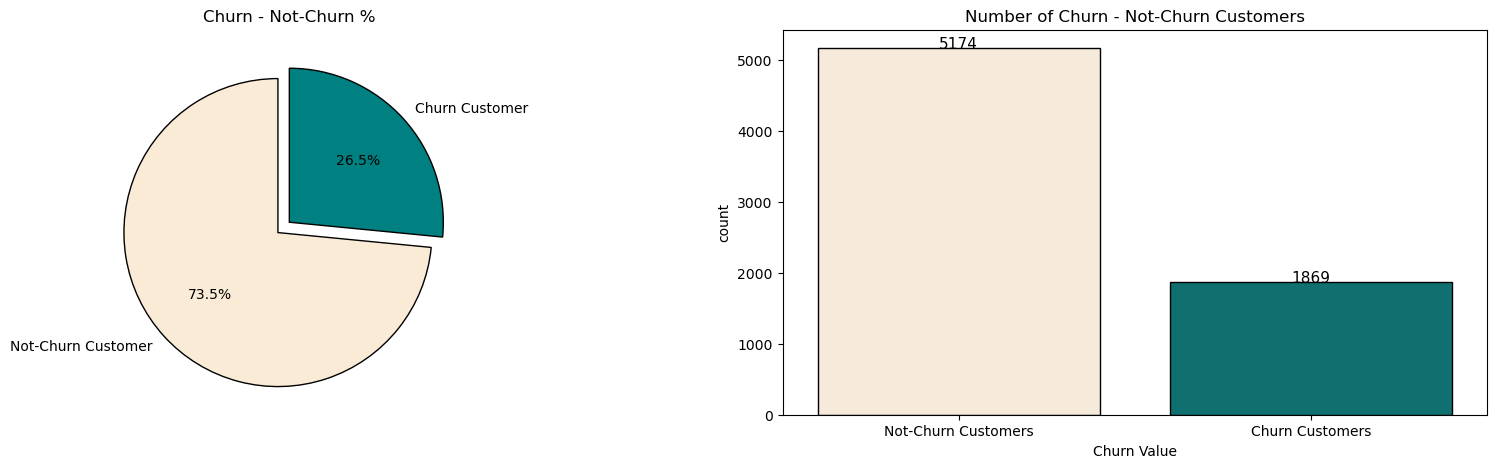

In [62]:
l = list(df['Churn Value'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn Value',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

# Grupppo 1 
### gender | Senior Citizen | Partner | Dependents


In [63]:
l1 = ['Gender','Senior Citizen','Partner','Dependents'] # Customer Information
print(str(l1) + ' is Customer Information')
print('\n')
l2 = ['Phone Service','Multiple Lines','Internet Service','Streaming TV','Streaming Movies',
      'Online Security','Online Backup','Device Protection','Tech Support'] # Services Signed Up for!
print(str(l2) + 'Servizio per il quale ci siamo isritti')
print('\n')
l3 = ['Contract','Paperless Billing','Payment Method'] # Payment Information
print(str(l3) + ' è il metodo di pagamento')

['Gender', 'Senior Citizen', 'Partner', 'Dependents'] is Customer Information


['Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support']Servizio per il quale ci siamo isritti


['Contract', 'Paperless Billing', 'Payment Method'] è il metodo di pagamento


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


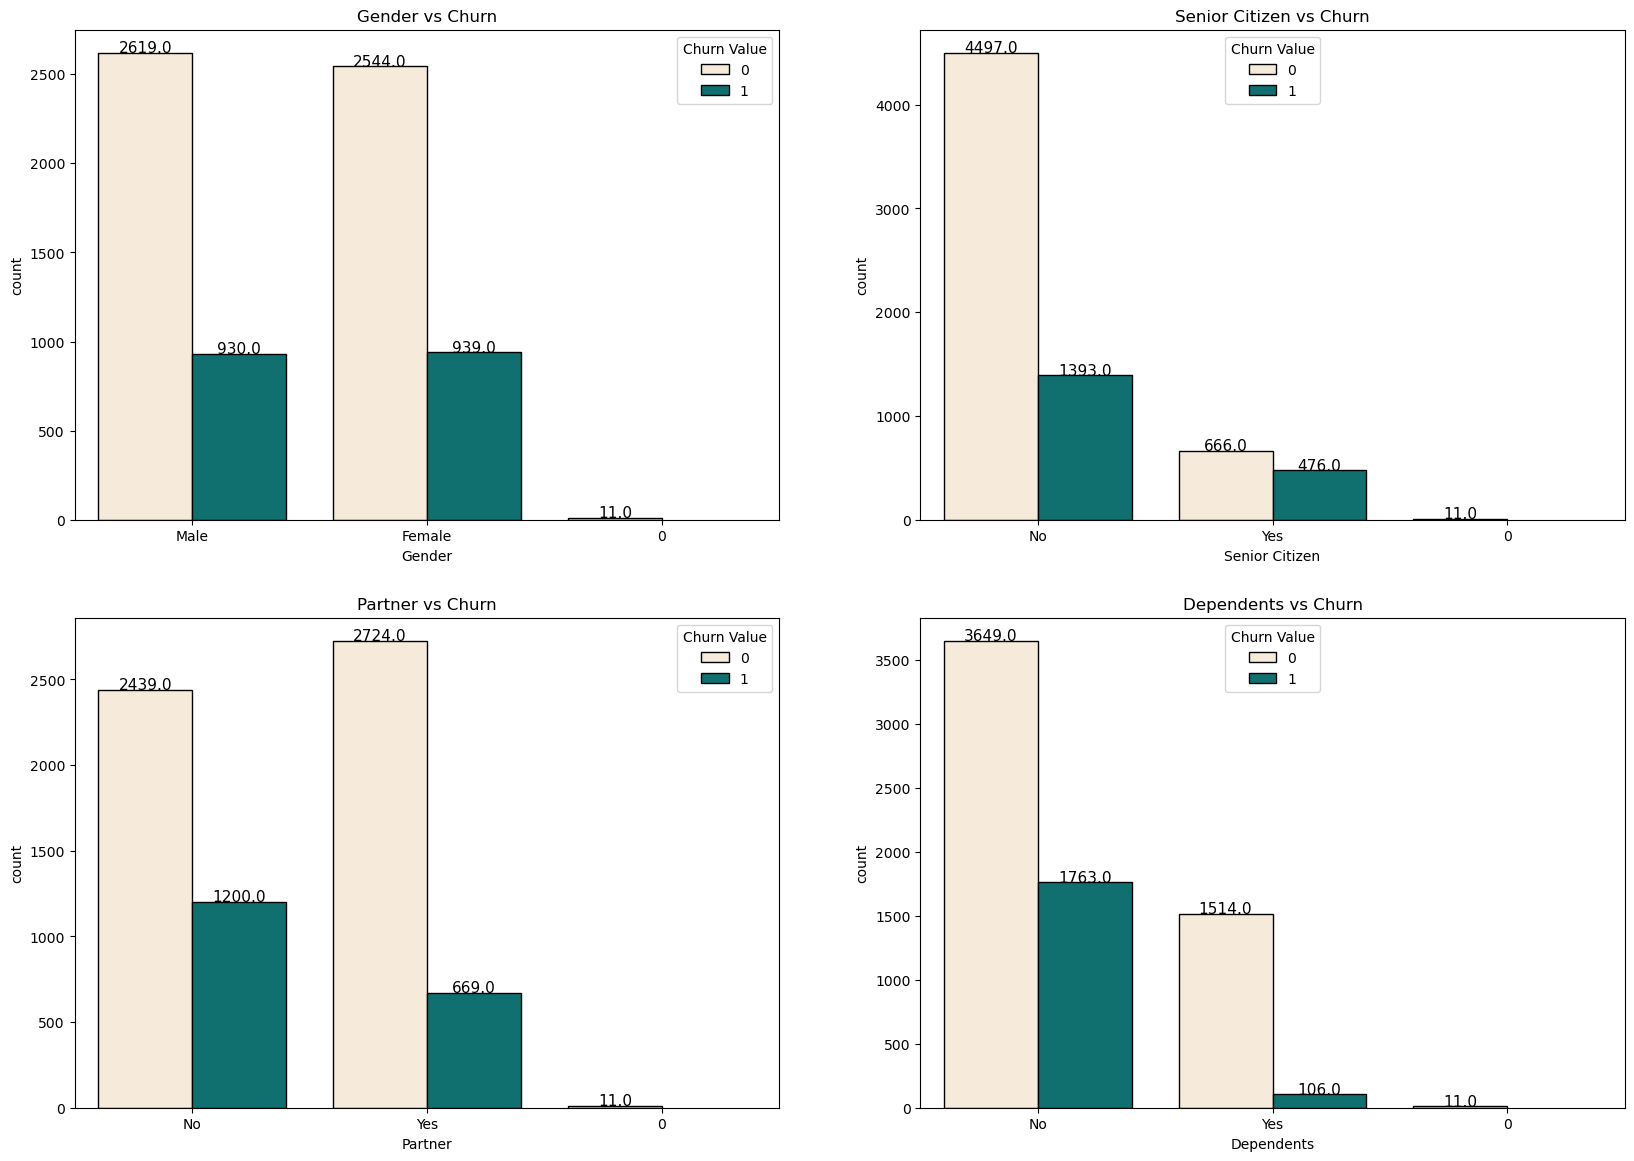

In [64]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

# Grupppo 2


In [65]:
print(l2)

['Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support']


# Group 2: Services Subscribed by the Customer :
## For visualization purposes, we will create 2 groups!
 ### PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


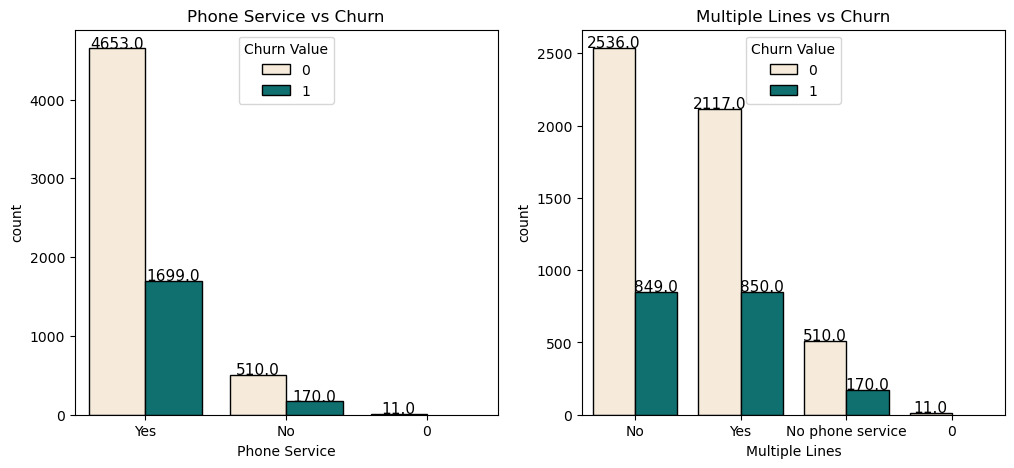

posx and posy should be finite values
posx and posy should be finite values


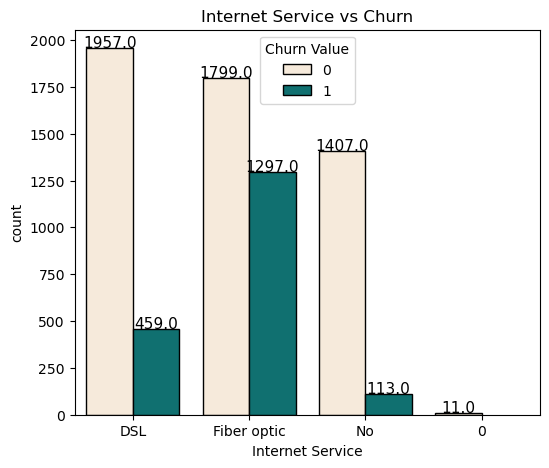

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


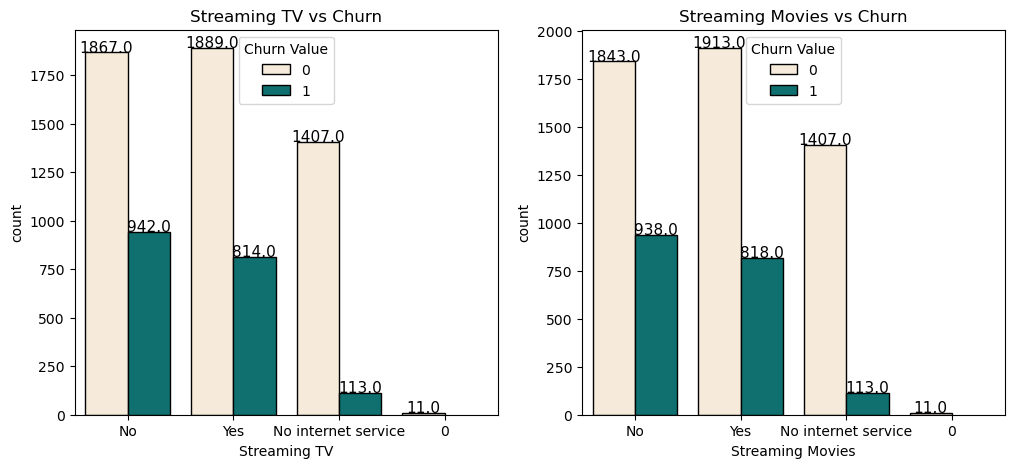

In [66]:
fig = plt.subplots(figsize = (12,5))
for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

# Group 2: Services Subscribed by the Customer :
### OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


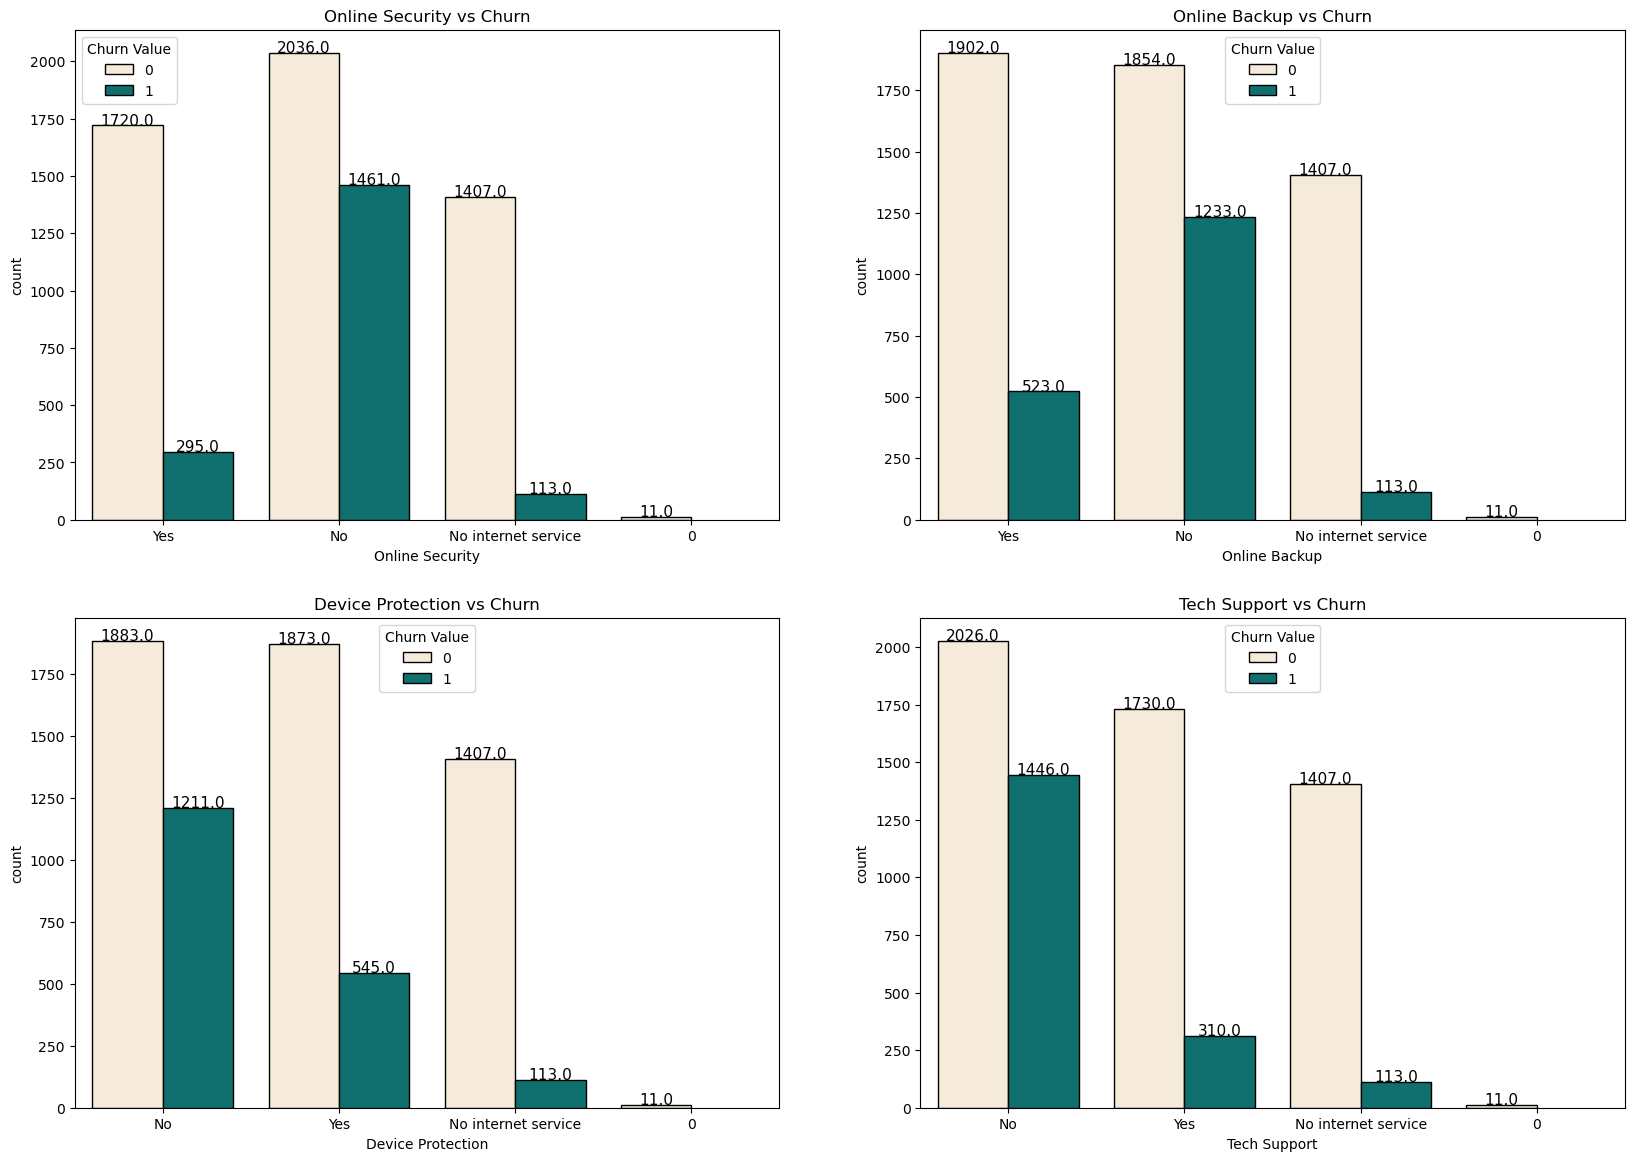

In [67]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(l2[-4 + i],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

In [68]:
l3

['Contract', 'Paperless Billing', 'Payment Method']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


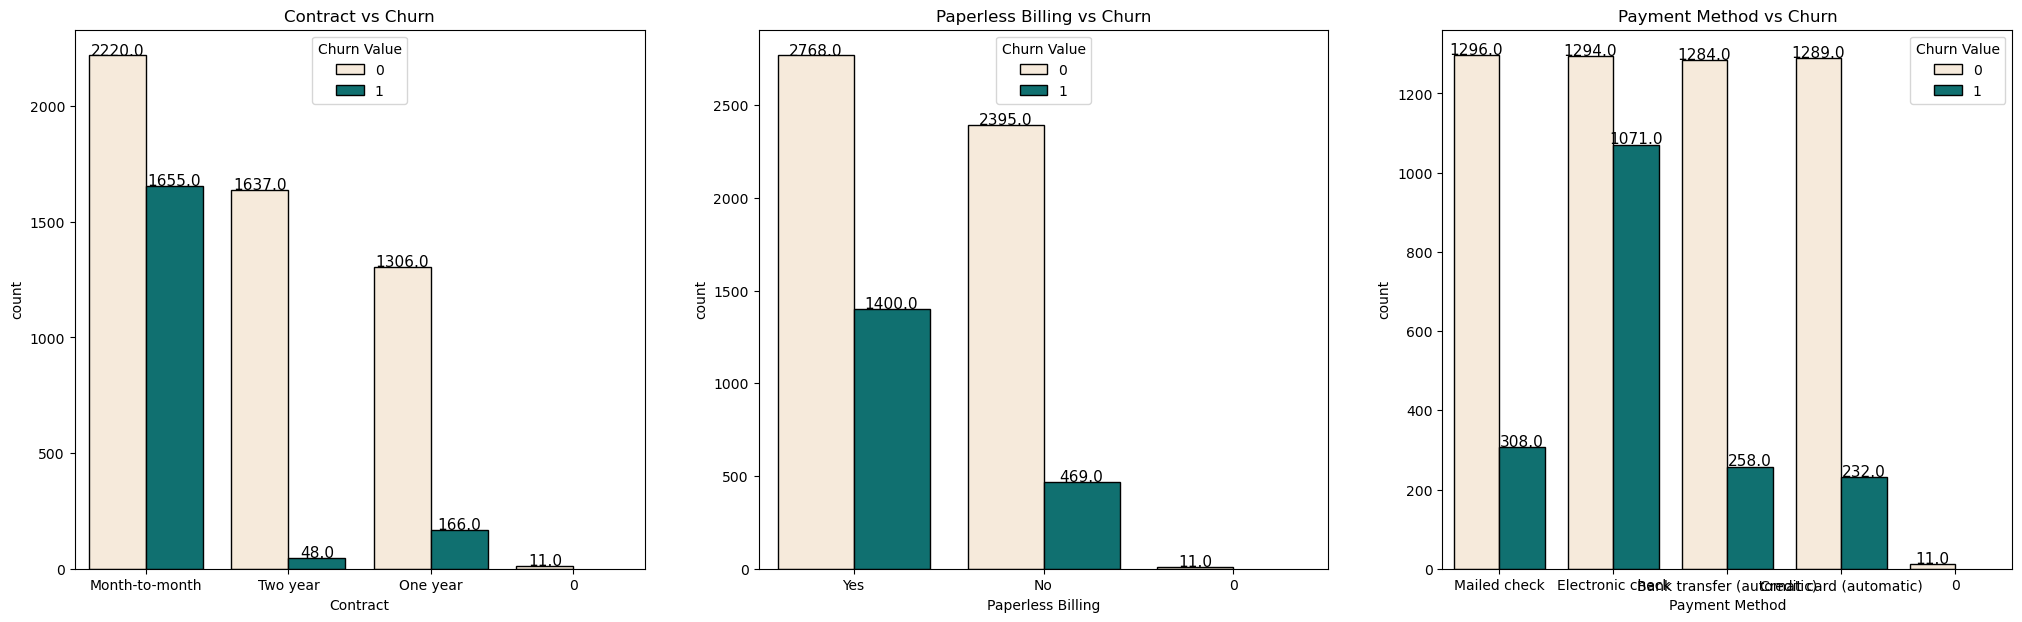

In [69]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(l3[0],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(l3[1],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(l3[2],data = df,hue = "Churn Value",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

# Numerical Features :
## Distribution of Numerical Features :

In [70]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure Months    7043 non-null   int64  
 1   Monthly Charges  7043 non-null   float64
 2   Total Charges    7043 non-null   int32  
 3   CLTV             7043 non-null   int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 192.7 KB


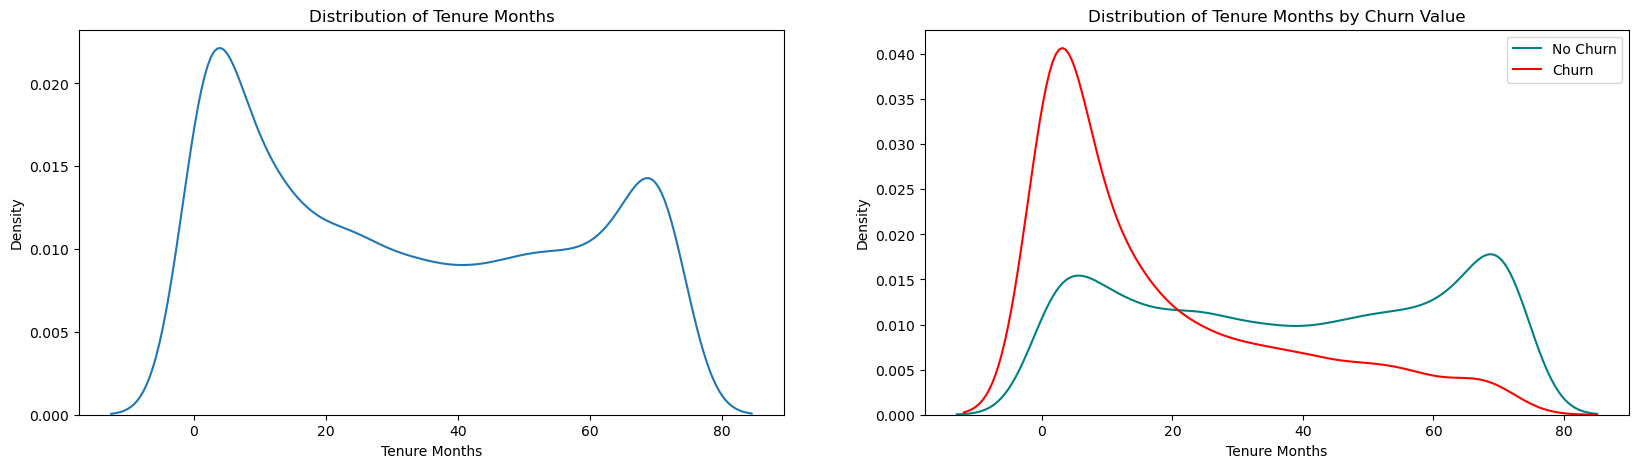

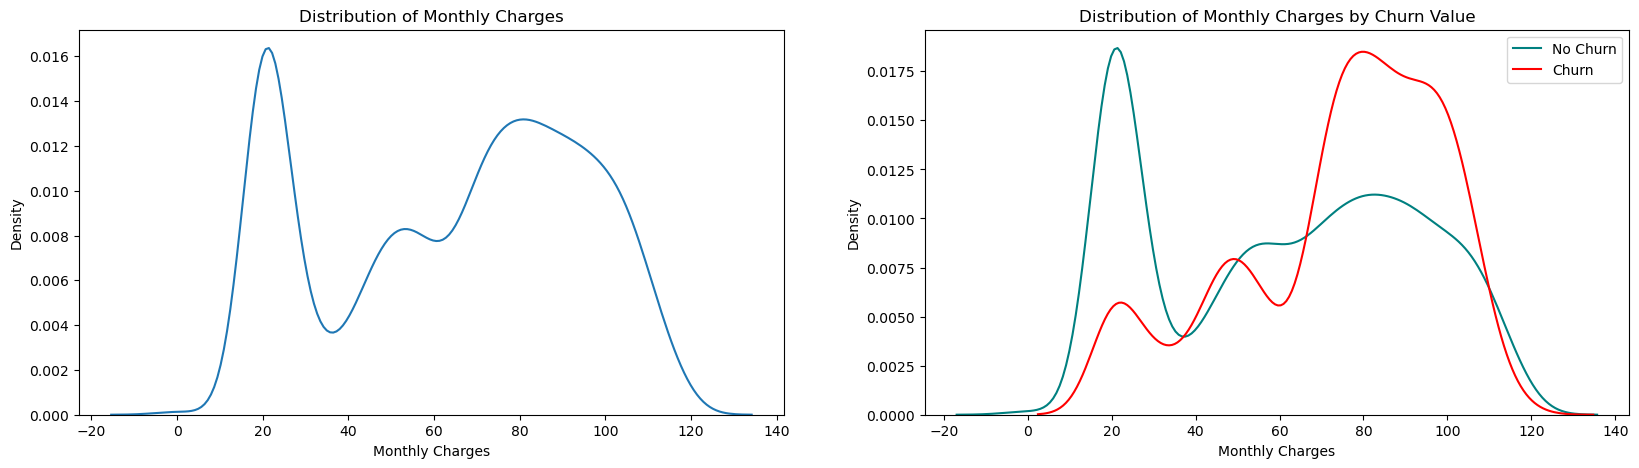

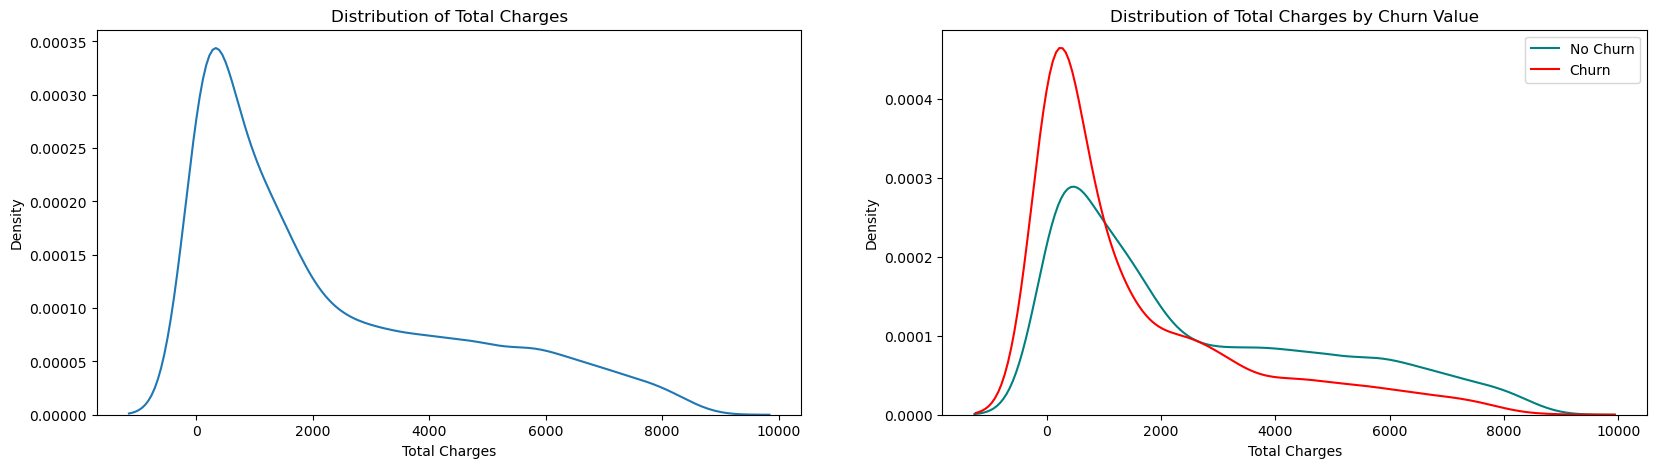

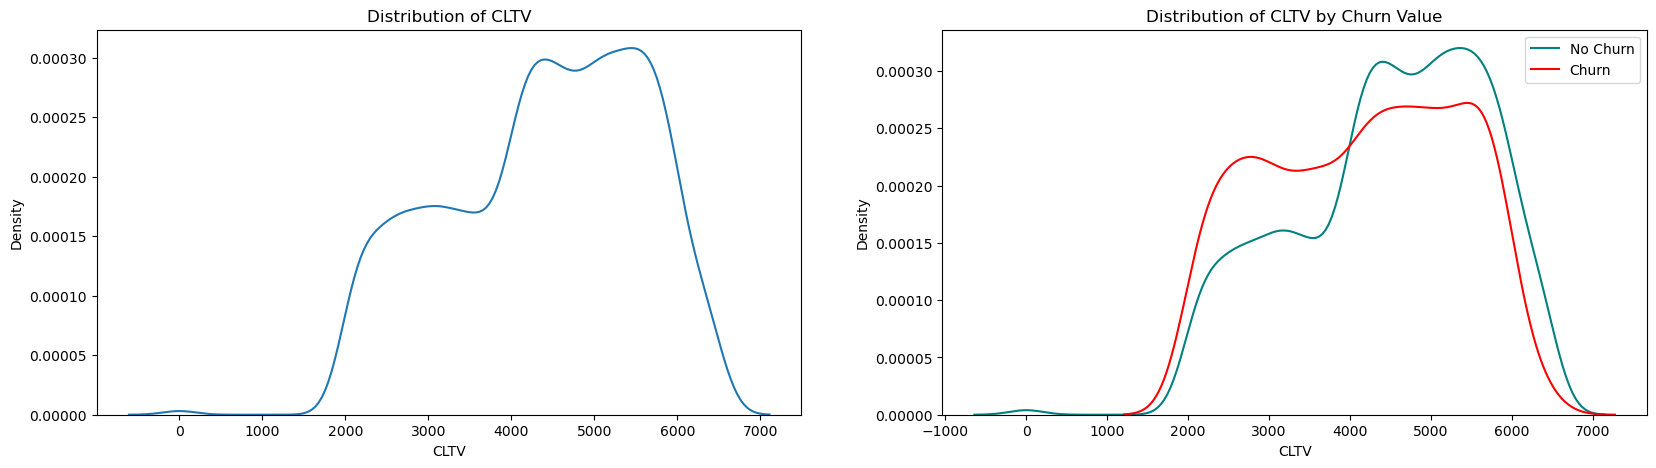

In [71]:
for col in df[numerical]:  
    fig, ax=plt.subplots(1,2, figsize=(20,5))
    #Kdensity plot della singola feature
    sns.kdeplot(x=col, data=df, ax=ax[0]) 
    ax[0].set_title('Distribution of ' + col)
    #Kdensity plot del churn value sulla base della feature
    sns.kdeplot(df[col][(df["Churn Value"] == 0)], color=colors[1], shade = False, label='No Churn' ,ax=ax[1])
    sns.kdeplot(df[col][(df["Churn Value"] == 1)], color="Red", shade = False, label='Churn', ax=ax[1])
    ax[1].set_title('Distribution of '+ col+' by Churn Value')
    plt.legend()

In [72]:
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             7043 non-null   object
 1   Senior Citizen     7043 non-null   object
 2   Partner            7043 non-null   object
 3   Dependents         7043 non-null   object
 4   Phone Service      7043 non-null   object
 5   Multiple Lines     7043 non-null   object
 6   Internet Service   7043 non-null   object
 7   Online Security    7043 non-null   object
 8   Online Backup      7043 non-null   object
 9   Device Protection  7043 non-null   object
 10  Tech Support       7043 non-null   object
 11  Streaming TV       7043 non-null   object
 12  Streaming Movies   7043 non-null   object
 13  Contract           7043 non-null   object
 14  Paperless Billing  7043 non-null   object
 15  Payment Method     7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


In [73]:
df[categorical] = df[categorical].astype(str)

# Divisione Train - Test 

In [74]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
X_cat = ohe.fit_transform(df[categorical].values)

In [75]:
X = np.concatenate([df[numerical].values, X_cat], axis=1)

In [76]:
X

array([[2.0000e+00, 5.3850e+01, 1.0800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 7.0700e+01, 1.5100e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.0000e+00, 9.9650e+01, 8.2000e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [7.2000e+01, 1.0320e+02, 7.3620e+03, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.1000e+01, 2.9600e+01, 3.4600e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.6000e+01, 1.0565e+02, 6.8440e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [77]:
y = np.array(df['Churn Value'])

In [78]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100, stratify=y)

In [81]:
#Scaling

In [82]:
ss = StandardScaler()
X_train[np.ix_(list(range(len(X_train))),[0,1,2,3])] = ss.fit_transform(X_train[np.ix_(list(range(len(X_train))),[0,1,2,3])])
X_test[np.ix_(list(range(len(X_test))),[0,1,2,3])] = ss.transform(X_test[np.ix_(list(range(len(X_test))),[0,1,2,3])])

In [83]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 4139, 1: 1495})
Counter({0: 1035, 1: 374})


In [84]:
#Decision Tree

In [85]:
dt = DecisionTreeClassifier(random_state=44)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.55      0.50      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



<AxesSubplot:>

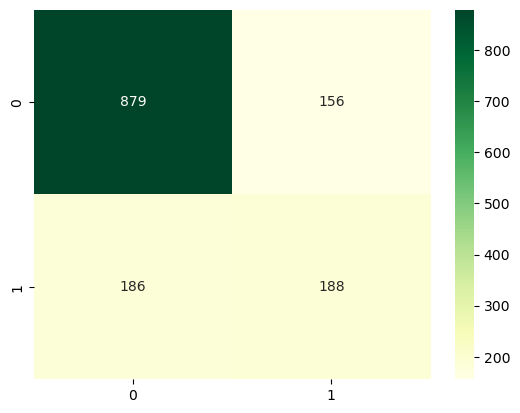

In [86]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap = 'YlGn',annot = True, fmt='d')

In [87]:
# Iper parametri per Decision Tree 

In [88]:
dt = DecisionTreeClassifier()

In [89]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,50,100]
}
clf = GridSearchCV(
    estimator=dt,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}


In [90]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



<AxesSubplot:>

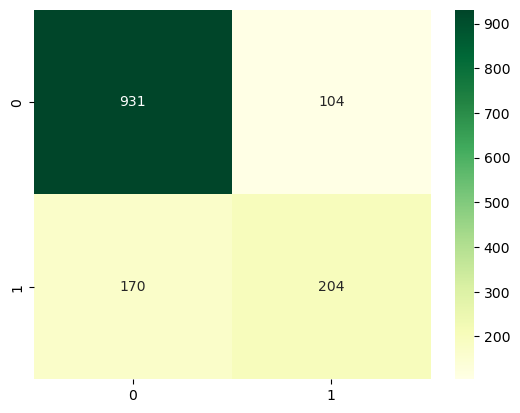

In [92]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, cmap = 'YlGn',annot = True, fmt='d')

In [93]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    

In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

NameError: name 'x_train' is not defined

In [ ]:
#Linear Regressor 